# Taller de Clustering
## Presentado por: Daniel Felipe Rodriguez Villalba, Laura Valentina Sánchez Lombana y Nicolas Santiago Cardenas Garcia. 

In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import rcParam

In [52]:
X= pd.read_excel("Datos_VRP.xlsx", index_col= "i")

<function matplotlib.pyplot.show(*args, **kw)>

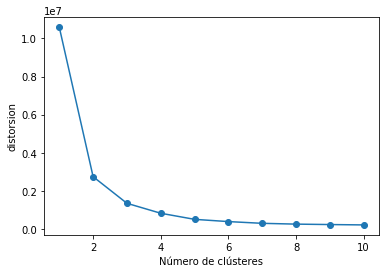

In [53]:
#encontrar en numero optimo de clusters
#lista en blanco para que el ciclo agregue las inercias de cada modelo 
distorsiones= []
for i in range(1,11):
#instanciar los modelos
    kms = KMeans(n_clusters= i, init = 'k-means++', n_init= 10, max_iter = 300)
    kms.fit(X)
    distorsiones.append(kms.inertia_)
    
#graficar el resultado 
plt.plot(range(1,11), distorsiones, marker = 'o')
plt.xlabel('Número de clústeres')
plt.ylabel('distorsion')
plt.show

In [54]:
# instanciar el modelo con el resultado del codo encontrado, el cual es 2.
km= KMeans(n_clusters=2, init= 'k-means++', n_init= 10, max_iter= 300, tol= 1e-04)

# Predicción de los clústeres
y_km = km.fit_predict(X)
y_km

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int32)

In [47]:
# Centroides de los clústeres
km.cluster_centers_

array([[ 39.78125   ,  44.703125  ,  17.078125  , 222.640625  ,
        342.640625  ],
       [ 40.63888889,  43.97222222,  17.52777778, 635.25      ,
        755.25      ]])

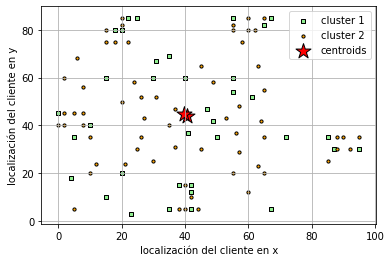

In [60]:
# Graficación de los ejes x y y 
plt.scatter(X[y_km == 0]['x'], X[y_km == 0]['y'], s=10, c='lightgreen',marker='s', edgecolors='black',label='cluster 1')

plt.scatter(X[y_km == 1]['x'], X[y_km == 1]['y'], s=10, c='orange',marker='o', edgecolors='black',label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s=250, marker='*', c ='red', edgecolors='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel('localización del cliente en x')
plt.ylabel('localización del cliente en y')

plt.grid()

plt.show()



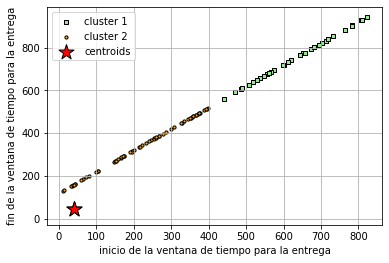

In [62]:
# Graficación de los ejes di y ei
plt.scatter(X[y_km == 0]['ei'], X[y_km == 0]['li'], s=10, c='lightgreen',marker='s', edgecolors='black',label='cluster 1')

plt.scatter(X[y_km == 1]['ei'], X[y_km == 1]['li'], s=10, c='orange',marker='o', edgecolors='black',label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s=250, marker='*', c ='red', edgecolors='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel('inicio de la ventana de tiempo para la entrega')
plt.ylabel('fin de la ventana de tiempo para la entrega')
plt.grid()

plt.show()




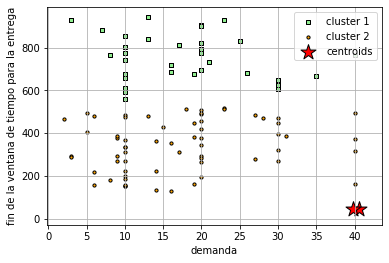

In [63]:
# Graficación de los ejes di y ei
plt.scatter(X[y_km == 0]['di'], X[y_km == 0]['li'], s=10, c='lightgreen',marker='s', edgecolors='black',label='cluster 1')

plt.scatter(X[y_km == 1]['di'], X[y_km == 1]['li'], s=10, c='orange',marker='o', edgecolors='black',label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s=250, marker='*', c ='red', edgecolors='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel('demanda')
plt.ylabel('fin de la ventana de tiempo para la entrega')
plt.grid()

plt.show()